In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb

2023-04-01 12:43:36.002105: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-01 12:43:36.006096: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/maven/3.6.3/lib
2023-04-01 12:43:36.006117: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
mnist= tf.keras.datasets.mnist
(train_images,train_labels) , (test_images,test_labels)=mnist.load_data()

train_images.shape :  (60000, 56, 56)


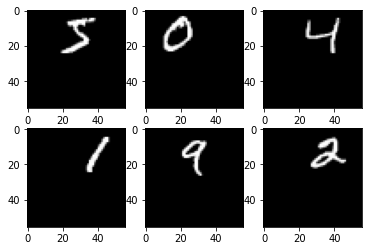

In [3]:
temp=[]
for i in range(len(train_images)):
    (x,y) = (0,random.randint(0,28))
    temp_img= np.array([[ 0 for i in range(56)] for j in range(56)]) 
    temp_img[x:x+28 , y:y+28] += train_images[i]
    temp.append(temp_img)
    
train_images=np.array(temp)
print('train_images.shape : ',train_images.shape)
train_images = train_images.reshape((60000,56,56,1))
train_images = train_images/255
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(train_images[i],cmap='gray')
plt.show()


test_images.shape :  (10000, 56, 56)


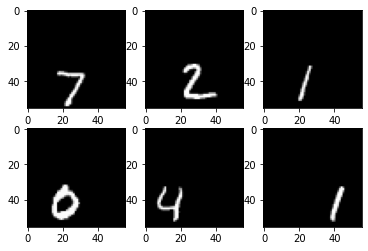

In [4]:
temp=[]
for i in range(len(test_images)):
    (x,y) = (28,random.randint(0,28))
    temp_img= np.array([[ 0 for i in range(56)] for j in range(56)]) 
    temp_img[x:x+28 , y:y+28] += test_images[i]
    temp.append(temp_img)
    
test_images=np.array(temp)
print('test_images.shape : ',test_images.shape)
test_images = test_images.reshape((10000,56,56,1))
test_images = test_images/255

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(test_images[i],cmap='gray')
plt.show()

In [5]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(128,3,input_shape=(56,56,1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256,activation= 'relu'))
model.add(tf.keras.layers.Dense(128,activation= 'relu'))
model.add(tf.keras.layers.Dense(10))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 256)               2

2023-04-01 12:43:56.775581: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/maven/3.6.3/lib
2023-04-01 12:43:56.775632: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-01 12:43:56.775657: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dover): /proc/driver/nvidia/version does not exist
2023-04-01 12:43:56.776103: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
epochs=5
batchSize=64

model.compile(loss=loss,optimizer=optim,metrics=metrics)
model.fit(train_images,train_labels,batch_size=batchSize,epochs=epochs,shuffle=True)



Epoch 1/5
938/938 [==============================] - 80s 85ms/step - loss: 0.2243 - accuracy: 0.9280
Epoch 2/5
938/938 [==============================] - 86s 92ms/step - loss: 0.0611 - accuracy: 0.9807
Epoch 3/5
938/938 [==============================] - 87s 92ms/step - loss: 0.0356 - accuracy: 0.9887
Epoch 4/5
938/938 [==============================] - 79s 84ms/step - loss: 0.0266 - accuracy: 0.9915
Epoch 5/5
938/938 [==============================] - 75s 80ms/step - loss: 0.0202 - accuracy: 0.9931


In [7]:
model.evaluate(test_images,test_labels,batchSize)

157/157 [==============================] - 3s 21ms/step - loss: 7.6491 - accuracy: 0.0506


[7.649077892303467, 0.050599999725818634]

Prediction :  8


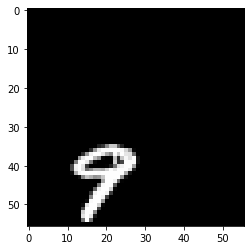

In [8]:
pred_model=tf.keras.models.Sequential()
pred_model.add(model)
pred_model.add(tf.keras.layers.Softmax())

cnt =random.randint(100)

predtions= pred_model(test_images)
pred=predtions[cnt]
label= np.argmax(pred)

# print pred + Image
plt.imshow(test_images[cnt],cmap='gray')
print("Prediction : ",label)



313/313 [==============================] - 4s 11ms/step


<AxesSubplot:>

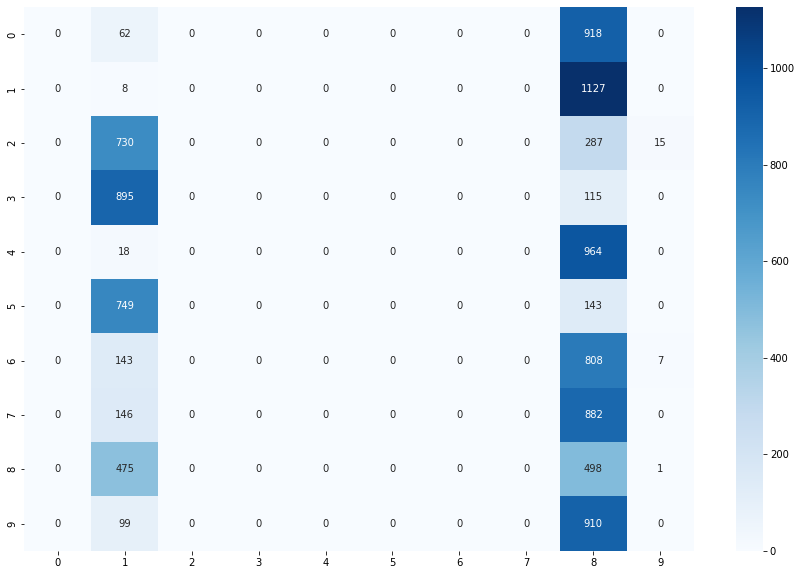

In [9]:
y_pred = np.argmax(pred_model.predict(test_images), axis=1)
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

conf_matrix = pd.DataFrame(confusion_matrix(test_labels, y_pred), columns=labels, index=labels)
plt.figure(figsize=(15,10))  
sb.heatmap(conf_matrix, annot=True, fmt="d",cmap="Blues")